In [1]:
### FITTING MULTI LINEAR REGRESSION MODEL FOR COVID DATASET

In [2]:
## Modules required
import pandas as pd
import seaborn as sns
import numpy as np
import pylab
import math
import matplotlib.pyplot as plt

In [3]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

In [4]:
 ## Load the dataset into pandas
covid19=pd.read_excel('covid19.xlsx')


In [5]:
covid19.head()

,STATE,STCD,REGION,CDHS,HOSC,ICU,PLUF,SINC,POPD,POPS,...,UNEM,MEDA,LEXP,ADEP,ATEM,APRE,CIGA,OBES,CNCS,MRAT
0,Alabama,AL,Southeast,1265,1547,0,16.8,219230,96.9221,4908620,...,7.5,20,75.4,63.1,62.8,58.3,19.2,36.2,71813,1.761520
1,Alaska,AK,West,11,34,0,11.1,46099,1.2863,734002,...,12.4,21,78.3,55.8,26.6,22.5,19.1,29.5,2619,0.420008
2,Arizona,AZ,Southwest,2443,3094,870,14.1,346009,64.9549,7378490,...,10.0,22,79.5,67.2,60.3,13.6,14.0,29.5,150609,1.622081
3,Arkansas,AR,Southeast,362,474,0,16.8,137609,58.4030,3039000,...,8.0,27,76.0,66.4,60.4,50.6,22.7,37.1,35246,1.027067
4,California,CA,West,7100,8820,2284,12.8,2701899,256.3728,39937500,...,14.9,26,80.8,58.1,59.4,22.2,11.2,25.8,413576,1.716734


In [6]:
## set the index equal to the year column
covid19.index = covid19['CDHS']
covid19 = covid19.drop(['STATE', 'STCD','REGION','CDHS'], axis = 1)

In [7]:
covid19.head()

,HOSC,ICU,PLUF,SINC,POPD,POPS,HOML,HUMI,UNEM,MEDA,LEXP,ADEP,ATEM,APRE,CIGA,OBES,CNCS,MRAT
CDHS,,,,,,,,,,,,,,,,,,
1265,1547,0,16.8,219230,96.9221,4908620,3261,76.49,7.5,20,75.4,63.1,62.8,58.3,19.2,36.2,71813,1.761520
11,34,0,11.1,46099,1.2863,734002,1907,81.46,12.4,21,78.3,55.8,26.6,22.5,19.1,29.5,2619,0.420008
2443,3094,870,14.1,346009,64.9549,7378490,10007,79.40,10.0,22,79.5,67.2,60.3,13.6,14.0,29.5,150609,1.622081
362,474,0,16.8,137609,58.4030,3039000,2717,76.92,8.0,27,76.0,66.4,60.4,50.6,22.7,37.1,35246,1.027067
7100,8820,2284,12.8,2701899,256.3728,39937500,151278,80.36,14.9,26,80.8,58.1,59.4,22.2,11.2,25.8,413576,1.716734


In [8]:
## Get the summary of our original data set
desc_covid19 = covid19.describe()
## Add the standard deviation metric
desc_covid19.loc['+3_std']=desc_covid19.loc['mean']+(desc_covid19.loc['std']*3)
desc_covid19.loc['-3_std']=desc_covid19.loc['mean']-(desc_covid19.loc['std']*3)
desc_covid19

,HOSC,ICU,PLUF,SINC,POPD,POPS,HOML,HUMI,UNEM,MEDA,LEXP,ADEP,ATEM,APRE,CIGA,OBES,CNCS,MRAT
count,54.000000,54.000000,54.000000,5.400000e+01,54.000000,5.400000e+01,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,1104.222222,193.648148,12.148148,3.509831e+05,188.797204,6.122194e+06,10290.055556,73.259444,9.285185,19.407407,72.857407,57.701852,48.096296,34.237037,15.553704,30.716667,73081.259259,2.845177
std,2233.213293,543.764695,4.018483,4.635854e+05,262.712798,7.401568e+06,23642.778670,18.085235,3.764301,7.196746,20.864302,16.789411,16.082147,17.526834,4.954271,5.704574,100868.791513,1.996974
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,0.420008
25%,64.000000,0.000000,10.625000,7.769300e+04,36.683350,1.381610e+06,1524.500000,75.715000,7.525000,17.000000,77.275000,59.000000,44.400000,20.625000,13.775000,28.400000,13226.500000,1.412560
50%,403.500000,13.000000,12.350000,2.097215e+05,93.333700,4.127955e+06,4011.500000,77.050000,8.650000,19.000000,78.750000,62.150000,50.000000,39.150000,15.850000,30.800000,39225.000000,1.986906
75%,1101.000000,149.500000,14.100000,4.808068e+05,218.398050,7.278018e+06,9201.000000,79.392500,11.200000,22.000000,79.875000,64.225000,57.100000,47.850000,18.975000,34.250000,82895.750000,3.933966
max,10893.000000,3281.000000,19.800000,2.701899e+06,1215.198500,3.993750e+07,151278.000000,82.010000,17.400000,48.000000,82.300000,69.700000,70.700000,63.700000,23.400000,39.500000,413576.000000,8.359082
+3_std,7803.862100,1824.942234,24.203597,1.741739e+06,976.935597,2.832690e+07,81218.391565,127.515150,20.578089,40.997645,135.450313,108.070086,96.342738,86.817540,30.416516,47.830390,375687.633798,8.836098
-3_std,-5595.417655,-1437.645937,0.092700,-1.039773e+06,-599.341189,-1.608251e+07,-60638.280453,19.003739,-2.007719,-2.182830,10.264502,7.333618,-0.150145,-18.343466,0.690892,13.602943,-229525.115280,-3.145745


In [9]:
## Data preprocessing ##
## How is the distribution of the dependent variables?

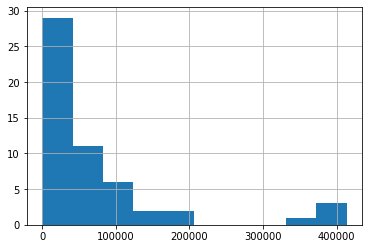

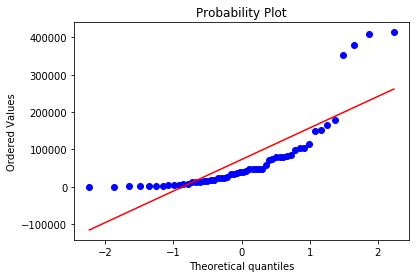

In [10]:
## Condisder CNCS 
CNCS = covid19.CNCS 
pd.Series(CNCS).hist()
plt.show()
stats.probplot(CNCS, dist="norm", plot=pylab)
pylab.show()

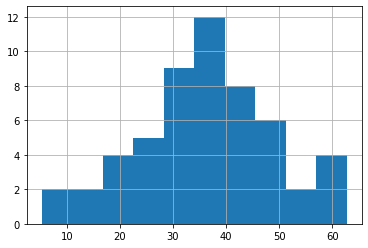

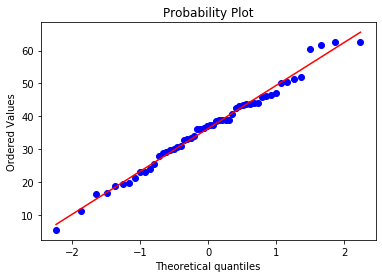

lambda parameter for Box-Cox Transformation is 0.20232519582590952


In [11]:
## Performing data transformation on this variable for normality
CNCS_bc, lmda = stats.boxcox(CNCS)
pd.Series(CNCS_bc).hist()
plt.show()
stats.probplot(CNCS_bc, dist = "norm", plot=pylab)
pylab.show()
print("lambda parameter for Box-Cox Transformation is {}".format(lmda))

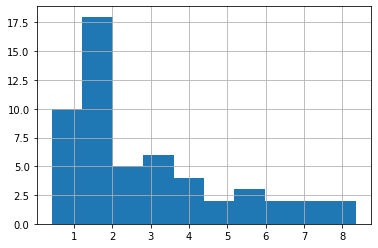

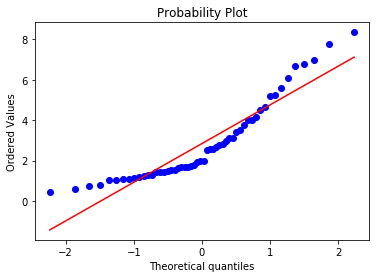

In [12]:
## Condisder MRAT 
MRAT = covid19.MRAT 
pd.Series(MRAT).hist()
plt.show()
stats.probplot(MRAT, dist="norm", plot=pylab)
pylab.show()

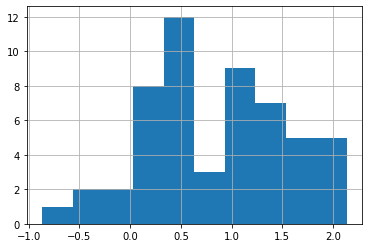

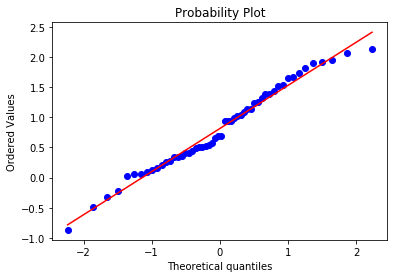

lambda parameter for Box-Cox Transformation is 0.003882782809026342


In [13]:
## Performing data transformation on this variable for normality
MRAT_bc, lmda = stats.boxcox(MRAT)
pd.Series(MRAT_bc).hist()
plt.show()
stats.probplot(MRAT_bc, dist = "norm", plot=pylab)
pylab.show()
print("lambda parameter for Box-Cox Transformation is {}".format(lmda))

In [14]:
covid19["MRAT"] = MRAT_bc
covid19["CNCS"] = CNCS_bc

In [15]:
## Checking the Model Assumptions
######## Multicolinearity #################
## printing out correlation matrix of the data frame
corr=covid19.corr()
## Display the correlation matrix
display(corr)

,HOSC,ICU,PLUF,SINC,POPD,POPS,HOML,HUMI,UNEM,MEDA,LEXP,ADEP,ATEM,APRE,CIGA,OBES,CNCS,MRAT
HOSC,1.000000,0.783354,0.214592,0.778834,0.069699,0.846651,0.555732,0.098759,0.157446,0.056074,0.124298,0.118983,0.378562,0.217130,0.067580,0.080038,0.635924,-0.208674
ICU,0.783354,1.000000,0.138199,0.719634,-0.007543,0.753193,0.548475,0.084027,0.147211,0.045335,0.097515,0.073675,0.228042,0.072459,0.078908,0.048655,0.471339,-0.138535
PLUF,0.214592,0.138199,1.000000,0.144771,-0.043094,0.200162,0.078809,0.714648,0.345506,0.357682,0.533521,0.607745,0.667526,0.437666,0.438371,0.587960,0.408797,-0.090166
SINC,0.778834,0.719634,0.144771,1.000000,0.254539,0.984750,0.889213,0.175348,0.432327,0.107861,0.222027,0.148435,0.319816,0.214580,0.003127,-0.035069,0.762188,0.037871
POPD,0.069699,-0.007543,-0.043094,0.254539,1.000000,0.209218,0.153910,0.112114,0.537803,0.079143,0.226472,0.120808,0.231584,0.423055,-0.152823,-0.131573,0.384925,0.520542
POPS,0.846651,0.753193,0.200162,0.984750,0.209218,1.000000,0.818138,0.189892,0.392972,0.091591,0.245149,0.189620,0.382708,0.260359,0.074792,0.032612,0.793436,-0.014079
HOML,0.555732,0.548475,0.078809,0.889213,0.153910,0.818138,1.000000,0.111731,0.390642,0.174102,0.144839,0.066961,0.174210,0.038462,-0.105630,-0.133165,0.544864,-0.019613
HUMI,0.098759,0.084027,0.714648,0.175348,0.112114,0.189892,0.111731,1.000000,0.570755,0.100406,0.850670,0.835359,0.692897,0.424430,0.408857,0.409182,0.362717,-0.026401
UNEM,0.157446,0.147211,0.345506,0.432327,0.537803,0.392972,0.390642,0.570755,1.000000,0.203597,0.559182,0.451502,0.449188,0.372698,0.080647,0.049998,0.486544,0.335970
MEDA,0.056074,0.045335,0.357682,0.107861,0.079143,0.091591,0.174102,0.100406,0.203597,1.000000,0.002128,0.000806,0.075851,0.024963,-0.223571,0.349345,0.256325,0.077939


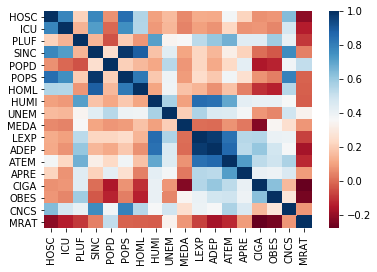

In [16]:
## plot a heatmap
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap="RdBu")

In [52]:
### Using the VIF to measure to detect the above and dropping all variable with greater than 10 VIF
covid19_before = covid19
covid19_after = covid19.drop(['SINC','POPS','HOML','LEXP','HOSC'], axis = 1)
x1 = sm.tools.add_constant(covid19_before)
x2 = sm.tools.add_constant(covid19_after)

#Create a series for both
series_before = pd.Series([variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])], index = x1.columns)
series_after = pd.Series([variance_inflation_factor(x2.values, i) for i in range(x2.shape[1])], index = x2.columns)

## dispay the series
print('DATA BEFORE')
print('-'*100)
display(series_before)

print('DATA AFTER')
print('-'*100)
display(series_after)

DATA BEFORE
----------------------------------------------------------------------------------------------------


const     55.162561
HOSC      10.124455
ICU        3.527610
PLUF       7.779758
SINC     333.587585
POPD       3.405971
POPS     253.498730
HOML      23.741745
HUMI      12.113615
UNEM       3.217367
MEDA       2.885858
LEXP      68.271441
ADEP      56.743280
ATEM      13.095885
APRE       3.135952
CIGA       4.354244
OBES       3.902259
CNCS       6.506840
MRAT       2.262323
dtype: float64

DATA AFTER
----------------------------------------------------------------------------------------------------


const    49.460115
ICU       1.541582
PLUF      4.319143
POPD      2.567941
HUMI      7.396901
UNEM      2.789414
MEDA      2.493145
ADEP     12.665588
ATEM     10.440902
APRE      2.935465
CIGA      3.911578
OBES      3.469457
CNCS      2.431905
MRAT      1.704872
dtype: float64

In [53]:
covid19_after

,ICU,PLUF,POPD,HUMI,UNEM,MEDA,ADEP,ATEM,APRE,CIGA,OBES,CNCS,MRAT
CDHS,,,,,,,,,,,,,
1265,0,16.8,96.9221,76.49,7.5,20,63.1,62.8,58.3,19.2,36.2,42.534352,0.566800
11,0,11.1,1.2863,81.46,12.4,21,55.8,26.6,22.5,19.1,29.5,19.352913,-0.866023
2443,870,14.1,64.9549,79.40,10.0,22,67.2,60.3,13.6,14.0,29.5,50.209267,0.484164
362,0,16.8,58.4030,76.92,8.0,27,66.4,60.4,50.6,22.7,37.1,36.167220,0.026708
7100,2284,12.8,256.3728,80.36,14.9,26,58.1,59.4,22.2,11.2,25.8,62.715700,0.540991
1643,0,9.7,56.4012,79.71,10.5,18,56.7,45.1,15.9,14.5,23.0,37.456771,1.390424
4031,0,10.3,735.8695,79.34,9.8,21,59.8,49.0,50.3,12.2,27.4,38.859101,2.132126
517,7,12.2,504.3073,72.02,12.5,21,64.0,55.3,45.7,16.5,33.5,29.059185,1.324765
644,18,16.1,0.0000,77.41,8.6,28,0.0,0.0,0.0,0.0,24.7,27.848323,1.726006


In [54]:
#### Building the model ####
## considering CNCS as our dependent Variable ##
## define our input variable and our output variable where ###
x = covid19_after.drop(['CNCS', 'MRAT'], axis = 1)
y = covid19_after['CNCS']

In [55]:
## Split dataset into training and testing portion
from sklearn.model_selection import train_test_split
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)

## Scale the independent variables gives
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import numpy as np

min_max_scaler= preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train)
x_test_minmax = min_max_scaler.fit_transform(x_test)

In [56]:
x_train = x_train_minmax
x_test= x_test_minmax

In [57]:
## Create an instance of our model
regression_model = LinearRegression()

## Fit the model
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
## Getting multiple prediction
y_predict = regression_model.predict(x_test)
## Show the first five
y_predict[:5]

array([13.36137701, 32.5885226 ,  6.77703101, 31.03883019, 42.33630306])

In [59]:
## Evaluating the model
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Define our input variable
x2 = sm.add_constant(x)

## Create an OLS model
model = sm.OLS(y, x2)
## fit the data
est = model.fit()

In [60]:
## Testing the Model Assumptions
# Heteroscedasticity using the Breusch-Pegan test
#H0:σ2=σ2
#H1:σ2!=σ2

## Grab the p-values
_, pval, _, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)
print(pval, f_pval)
print('_'*100)
if pval > 0.05:
    print("For the Breusch Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("we fail to reject the null hypothesis, and conclude that there is no heteroscedasticity.")
else:
    print("For the Breusch Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("we reject the null hypothesis, and conclude that there is heteroscedasticity.")

0.06811122202682957 0.05174166821430557
____________________________________________________________________________________________________
For the Breusch Pagan's Test
The p-value was 0.06811
we fail to reject the null hypothesis, and conclude that there is no heteroscedasticity.


The number of lags will be 10
____________________________________________________________________________________________________
(array([1.74934168, 4.85216623, 6.20121829, 6.32270801, 8.61634465,
       8.71243281, 8.75217815, 9.37804163, 9.79834729, 9.87389321]), array([0.18595951, 0.08838234, 0.10222052, 0.17630964, 0.12538064,
       0.19040819, 0.27094176, 0.31141494, 0.36705559, 0.45162596]))
The lowest p-value found was 0.08838
we fail to reject the null hypothesis, and conclude that there is no Autocorrelation.
____________________________________________________________________________________________________


C:\Users\AGYEMANG ERIC\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


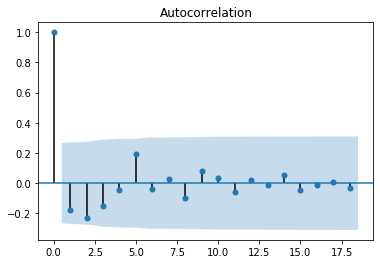

In [61]:
### Checking for Autocorrelation using the Ljungbox test
#H0: The data are random
#H1: The data are not random
## Calculate the lag
lag = min(10, (len(x)//5))
print('The number of lags will be {}'.format(lag))
print('_'*100)

## Perform the test
test_results = diag.acorr_ljungbox(est.resid, lags = lag)
## print the result for the test
print(test_results)

## Grab the P-Value and the test statistics
ibvalue, p_val = test_results

## print the result for the test
if min(p_val) > 0.05:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("we fail to reject the null hypothesis, and conclude that there is no Autocorrelation.")
    print('_'*100)
else:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("we reject the null hypothesis, and conclude that there is Autocorrelation.")
    print('_'*100)
      
## Plotting Autocorrelation
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
sm.graphics.tsa.plot_acf(est.resid)
plt.show()

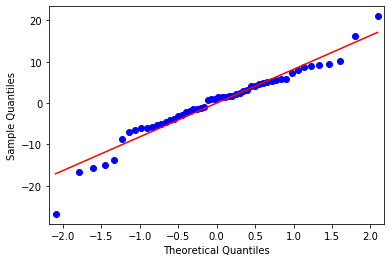

-1.7829359388054364e-14

In [62]:
## Check for Linearity of the residuals using the Q-Q plot
import pylab
sm.qqplot(est.resid, line = 's')
pylab.show()

## Checking that mean of the residuals is approximately zero
mean_residuals = sum(est.resid)/len(est.resid)
mean_residuals

In [63]:
## Model summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   CNCS   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     5.462
Date:                Wed, 21 Oct 2020   Prob (F-statistic):           2.50e-05
Time:                        01:56:00   Log-Likelihood:                -190.05
No. Observations:                  54   AIC:                             404.1
Df Residuals:                      42   BIC:                             428.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7159      8.416      0.798      0.4

In [64]:
#### Building the model ####
## considering MRAT as our dependent Variable ##
## define our input variable and our output variable where ###
x = covid19_after.drop(['CNCS', 'MRAT'], axis = 1)
y = covid19_after['MRAT']

In [65]:
## Split dataset into training and testing portion
from sklearn.model_selection import train_test_split
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)

## Scale the independent variables gives
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import numpy as np

min_max_scaler= preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train)
x_test_minmax = min_max_scaler.fit_transform(x_test)

In [66]:
x_train = x_train_minmax
x_test= x_test_minmax

In [67]:
## Create an instance of our model
regression_model = LinearRegression()

## Fit the model
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
## Getting multiple prediction
y_predict = regression_model.predict(x_test)
## Show the first five
y_predict[:5]

array([1.11697455, 0.56256124, 1.05272564, 0.80999288, 2.50372713])

In [69]:
## Evaluating the model
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Define our input variable
x2 = sm.add_constant(x)

## Create an OLS model
model = sm.OLS(y, x2)
## fit the data
est = model.fit()

In [70]:
## Testing the Model Assumptions
# Heteroscedasticity using the Breusch-Pegan test
#H0:σ2=σ2
#H1:σ2!=σ2

## Grab the p-values
_, pval, _, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)
print(pval, f_pval)
print('_'*100)
if pval > 0.05:
    print("For the Breusch Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("we fail to reject the null hypothesis, and conclude that there is no heteroscedasticity.")
else:
    print("For the Breusch Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("we reject the null hypothesis, and conclude that there is heteroscedasticity.")

0.19496889194734351 0.19445491270187962
____________________________________________________________________________________________________
For the Breusch Pagan's Test
The p-value was 0.195
we fail to reject the null hypothesis, and conclude that there is no heteroscedasticity.


The number of lags will be 10
____________________________________________________________________________________________________
(array([0.95212652, 2.00227003, 2.20090099, 2.20273294, 2.38205494,
       2.39558071, 3.26256125, 4.64234634, 4.73793016, 5.26275146]), array([0.3291786 , 0.36746213, 0.53177093, 0.69852896, 0.79414346,
       0.87996593, 0.85969769, 0.79502865, 0.85652907, 0.87294901]))
The lowest p-value found was 0.3292
we fail to reject the null hypothesis, and conclude that there is no Autocorrelation.
____________________________________________________________________________________________________


C:\Users\AGYEMANG ERIC\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


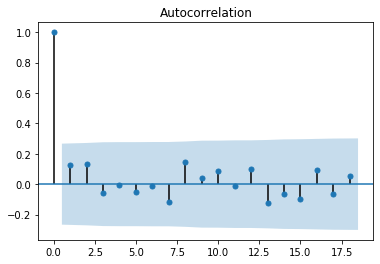

In [71]:
### Checking for Autocorrelation using the Ljungbox test
#H0: The data are random
#H1: The data are not random
## Calculate the lag
lag = min(10, (len(x)//5))
print('The number of lags will be {}'.format(lag))
print('_'*100)

## Perform the test
test_results = diag.acorr_ljungbox(est.resid, lags = lag)
## print the result for the test
print(test_results)

## Grab the P-Value and the test statistics
ibvalue, p_val = test_results

## print the result for the test
if min(p_val) > 0.05:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("we fail to reject the null hypothesis, and conclude that there is no Autocorrelation.")
    print('_'*100)
else:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("we reject the null hypothesis, and conclude that there is Autocorrelation.")
    print('_'*100)
      
## Plotting Autocorrelation
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
sm.graphics.tsa.plot_acf(est.resid)
plt.show()

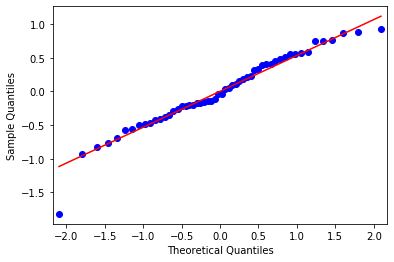

-1.0392921091629937e-15

In [72]:
## Check for Linearity of the residuals using the Q-Q plot
import pylab
sm.qqplot(est.resid, line = 's')
pylab.show()

## Checking that mean of the residuals is approximately zero
mean_residuals = sum(est.resid)/len(est.resid)
mean_residuals

In [73]:
## Model summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   MRAT   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     2.688
Date:                Wed, 21 Oct 2020   Prob (F-statistic):             0.0104
Time:                        02:05:03   Log-Likelihood:                -42.660
No. Observations:                  54   AIC:                             109.3
Df Residuals:                      42   BIC:                             133.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0834      0.549      1.972      0.0